# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.151597e+01     6.741542e+00
 * time: 0.005438804626464844
     1     2.917423e+01     4.924786e+00
 * time: 0.015980005264282227
     2     2.481407e+01     6.912377e+00
 * time: 0.04125189781188965
     3     1.543728e+01     2.325654e+00
 * time: 0.07140398025512695
     4     1.208006e+01     1.291758e+00
 * time: 0.09693479537963867
     5     1.189230e+01     1.280463e+00
 * time: 0.11742687225341797
     6     1.044988e+01     1.268664e+00
 * time: 0.13779878616333008
     7     1.007449e+01     1.065688e+00
 * time: 0.1580369472503662
     8     9.821264e+00     1.073533e+00
 * time: 0.17817997932434082
     9     9.532690e+00     8.159272e-01
 * time: 0.19850897789001465
    10     9.416581e+00     1.296331e+00
 * time: 0.21389079093933105
    11     9.416306e+00     8.367809e-01
 * time: 0.22911596298217773
    12     9.352493e+00     8.033614e-01
 * time: 0.244581937789917
    13     9.339688e+00     8.763410e-01
 * time: 

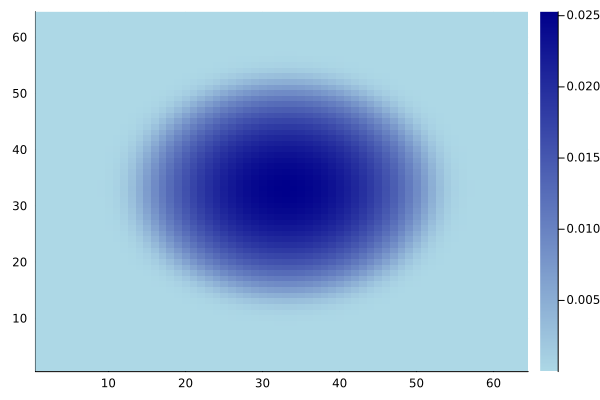

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)